In [5]:
from elegantIO import elegantLatticeFile
from elegantIO import elegant_findtwiss

import matplotlib.pyplot as plt

In [20]:
fodo_lattice=elegantLatticeFile()
fodo_lattice.addElement('bend', 'CSBEND', l=2.0, angle=0.1)
fodo_lattice.addElement('qfh', 'kquad', l=0.5, k1=0.45)
fodo_lattice.addElement('qdh', 'kquad', l=0.5, k1=-0.45)
fodo_lattice.addElement('df', 'edrift', l=0.2)

fodo_lattice.appendToBeamline('oo', 'df', 'bend','df')
fodo_lattice.appendToBeamline('fodo', 'qfh', 'oo','qdh','qdh','oo','qfh')
fodo_lattice.setUseLine()
fodo_lattice.useline

'FODO'

In [21]:
twiss_list, twiss_parameter=elegant_findtwiss(fodo_lattice,matched=1)

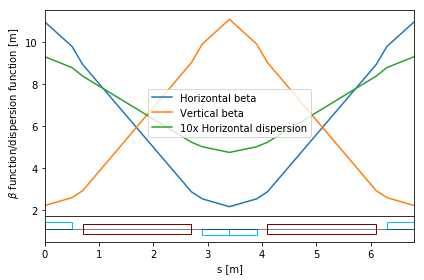

In [22]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

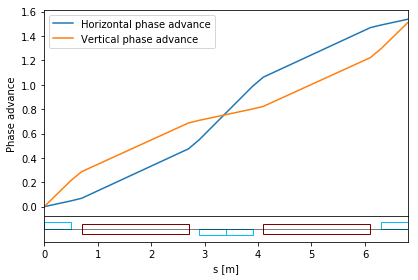

In [23]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[3], label='Horizontal phase advance')
ax1.plot(twiss_list[0], twiss_list[8], label='Vertical phase advance')

ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'Phase advance')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [24]:
fodo_lattice.addElement('w1','watch',filename='"%s_%03ld.w1"')
fodo_lattice.appendToBeamline('fodo', 'w1','qfh', 'w1','oo','w1','qdh','w1','qdh','w1','oo','qfh','w1')